,age,prior_offenses,employment_status,education_level,drug_history,reoffended
0,56,3,unemployed,college,0,0
1,46,4,unemployed,college,0,0
2,32,2,unemployed,college,1,0
3,25,1,employed,none,0,0
4,38,2,employed,high_school,0,1



📊 MODEL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       227
           1       0.24      0.23      0.23        73

    accuracy                           0.63       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.63      0.63      0.63       300


🔮 Predicted probability of reoffending: 0.01


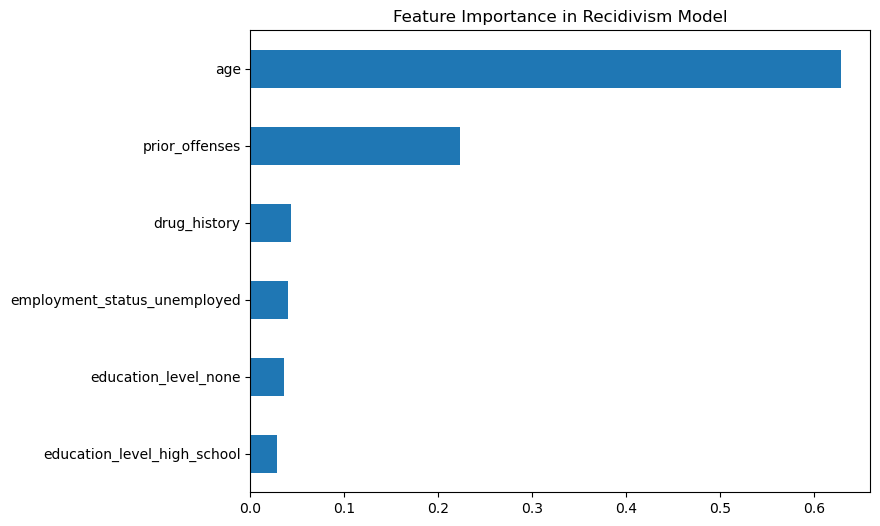


💾 Model saved as recidivism_model.pkl


In [1]:
import pandas as pd, numpy as np, joblib, matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

%matplotlib inline

# 1️⃣ Create synthetic data
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    "age": np.random.randint(18, 60, n),
    "prior_offenses": np.random.poisson(2, n),
    "employment_status": np.random.choice(["employed","unemployed"], n),
    "education_level": np.random.choice(["high_school","college","none"], n),
    "drug_history": np.random.choice([0,1], n),
    "reoffended": np.random.choice([0,1], n, p=[0.7,0.3])
})

display(data.head())

# 2️⃣ Encode
data = pd.get_dummies(data, drop_first=True)
X = data.drop("reoffended", axis=1)
y = data["reoffended"]

# 3️⃣ Split and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

# 4️⃣ Evaluate
print("\n📊 MODEL PERFORMANCE:")
print(classification_report(y_test, model.predict(X_test)))

# 5️⃣ Predict new case
new_case = pd.DataFrame({
    "age":[30],
    "prior_offenses":[3],
    "drug_history":[1],
    "employment_status_unemployed":[1],
    "education_level_college":[0],
    "education_level_none":[1]
}).reindex(columns=X.columns, fill_value=0)

prob = model.predict_proba(new_case)[0][1]
print(f"\n🔮 Predicted probability of reoffending: {prob:.2f}")

# 6️⃣ Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance in Recidivism Model")
plt.show()

# 7️⃣ Save model
joblib.dump(model,"recidivism_model.pkl")
print("\n💾 Model saved as recidivism_model.pkl")

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

# Generate features
age = np.random.normal(loc=30, scale=8, size=n).astype(int)
age = np.clip(age, 18, 60)

prior_offenses = np.random.poisson(lam=2, size=n)

employment_status = np.random.choice(["employed", "unemployed"], size=n, p=[0.6, 0.4])

education_level = np.random.choice(["none", "high_school", "college"], size=n, p=[0.2, 0.5, 0.3])

drug_history = np.random.choice([0,1], size=n, p=[0.7,0.3])

# Compute reoffended probability based on features
reoffended_prob = (
    0.3 
    + 0.01*(30 - age)  # younger = higher risk
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Create DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "reoffended": reoffended
})

synthetic_data.head()

,age,prior_offenses,employment_status,education_level,drug_history,reoffended
0,33,1,unemployed,college,0,1
1,28,2,unemployed,high_school,0,1
2,35,1,employed,high_school,1,0
3,42,5,unemployed,high_school,1,1
4,28,1,employed,college,0,0


In [4]:
data = pd.get_dummies(synthetic_data, drop_first=True)

# Features and target
X = data.drop("reoffended", axis=1)
y = data["reoffended"]

In [6]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000  # Number of synthetic individuals

# Features
age = np.random.normal(loc=30, scale=8, size=n).astype(int)
age = np.clip(age, 18, 60)

prior_offenses = np.random.poisson(lam=2, size=n)

employment_status = np.random.choice(["employed", "unemployed"], size=n, p=[0.6, 0.4])

education_level = np.random.choice(["none", "high_school", "college"], size=n, p=[0.2,0.5,0.3])

drug_history = np.random.choice([0,1], size=n, p=[0.7,0.3])

# Realistic probability of reoffending
reoffended_prob = (
    0.3
    + 0.01*(30 - age)          # younger = higher risk
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Create DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "reoffended": reoffended
})

# Save to CSV
synthetic_data.to_csv("new_cases_large.csv", index=False)
print("✅ Created large synthetic dataset: new_cases_large.csv")
synthetic_data.head(100)  # show first 10 rows

✅ Created large synthetic dataset: new_cases_large.csv


,age,prior_offenses,employment_status,education_level,drug_history,reoffended
0,33,1,unemployed,college,0,1
1,28,2,unemployed,high_school,0,1
2,35,1,employed,high_school,1,0
3,42,5,unemployed,high_school,1,1
4,28,1,employed,college,0,0
...,...,...,...,...,...,...
95,18,1,employed,high_school,0,1
96,32,2,employed,high_school,1,0
97,32,3,employed,high_school,0,1
98,30,0,employed,high_school,0,0


✅ Created large synthetic dataset: new_cases_large.csv


,age,prior_offenses,employment_status,education_level,drug_history,reoffended
0,33,1,unemployed,college,0,1
1,28,2,unemployed,high_school,0,1
2,35,1,employed,high_school,1,0
3,42,5,unemployed,high_school,1,1
4,28,1,employed,college,0,0
5,28,4,employed,none,0,1
6,42,2,employed,high_school,0,0
7,36,0,employed,high_school,0,0
8,26,1,unemployed,high_school,0,1
9,34,3,unemployed,high_school,0,1



📊 MODEL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.53      0.46      0.49       121
           1       0.66      0.72      0.69       179

    accuracy                           0.62       300
   macro avg       0.60      0.59      0.59       300
weighted avg       0.61      0.62      0.61       300



,age,prior_offenses,employment_status,education_level,drug_history,reoffended,predicted_risk
0,33,1,unemployed,college,0,1,0.956833
1,28,2,unemployed,high_school,0,1,0.964167
2,35,1,employed,high_school,1,0,0.679429
3,42,5,unemployed,high_school,1,1,0.903333
4,28,1,employed,college,0,0,0.020000
5,28,4,employed,none,0,1,0.880000
6,42,2,employed,high_school,0,0,0.040000
7,36,0,employed,high_school,0,0,0.815000
8,26,1,unemployed,high_school,0,1,0.720341
9,34,3,unemployed,high_school,0,1,0.821429


✅ Predictions saved to predicted_results_large.csv


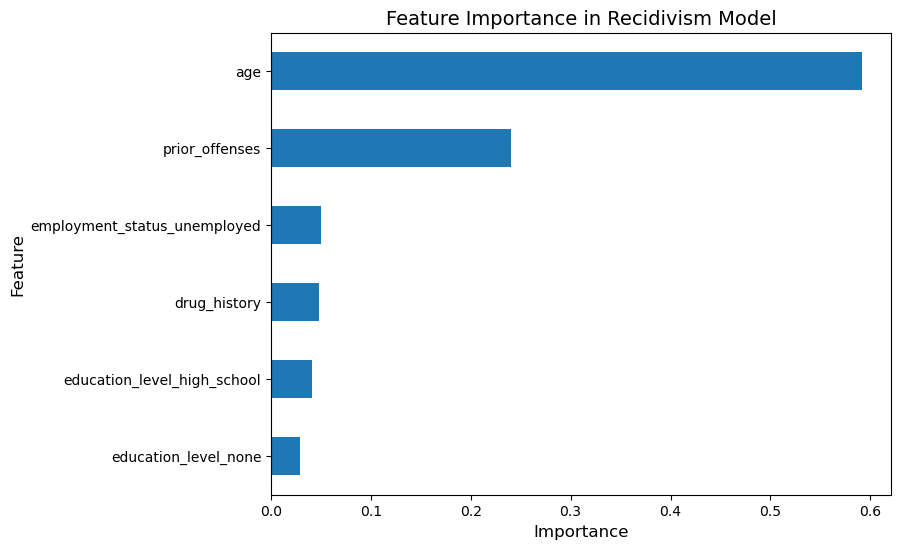

💾 Model saved as recidivism_model.pkl


In [7]:
# ==================================================
# Realistic Synthetic Recidivism AI Pipeline
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

%matplotlib inline

# -----------------------
# Step 1: Generate realistic synthetic data
# -----------------------
np.random.seed(42)
n = 1000  # Number of synthetic individuals

# Features
age = np.random.normal(loc=30, scale=8, size=n).astype(int)
age = np.clip(age, 18, 60)

prior_offenses = np.random.poisson(lam=2, size=n)

employment_status = np.random.choice(["employed", "unemployed"], size=n, p=[0.6, 0.4])

education_level = np.random.choice(["none", "high_school", "college"], size=n, p=[0.2,0.5,0.3])

drug_history = np.random.choice([0,1], size=n, p=[0.7,0.3])

# Compute reoffended probability
reoffended_prob = (
    0.3
    + 0.01*(30 - age)                # younger = higher risk
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Create DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "reoffended": reoffended
})

# Save to CSV
synthetic_data.to_csv("new_cases_large.csv", index=False)
print("✅ Created large synthetic dataset: new_cases_large.csv")
display(synthetic_data.head(10))

# -----------------------
# Step 2: Preprocess data
# -----------------------
data = pd.get_dummies(synthetic_data, drop_first=True)
X = data.drop("reoffended", axis=1)
y = data["reoffended"]

# -----------------------
# Step 3: Train/Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# Step 4: Train model
# -----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------
# Step 5: Evaluate model
# -----------------------
print("\n📊 MODEL PERFORMANCE:")
preds = model.predict(X_test)
print(classification_report(y_test, preds))

# -----------------------
# Step 6: Batch prediction on all synthetic cases
# -----------------------
new_cases = pd.read_csv("new_cases_large.csv")
new_cases_encoded = pd.get_dummies(new_cases, drop_first=True)
new_cases_encoded = new_cases_encoded.reindex(columns=X.columns, fill_value=0)

new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]
display(new_cases.head(10))

# Save predictions
new_cases.to_csv("predicted_results_large.csv", index=False)
print("✅ Predictions saved to predicted_results_large.csv")

# -----------------------
# Step 7: Feature importance visualization
# -----------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance in Recidivism Model", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# -----------------------
# Step 8: Save model
# -----------------------
joblib.dump(model, "recidivism_model.pkl")
print("💾 Model saved as recidivism_model.pkl")


In [8]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

# Existing features
age = np.random.normal(30, 8, n).astype(int)
age = np.clip(age, 18, 60)

prior_offenses = np.random.poisson(2, n)
employment_status = np.random.choice(["employed", "unemployed"], n, p=[0.6,0.4])
education_level = np.random.choice(["none","high_school","college"], n, p=[0.2,0.5,0.3])
drug_history = np.random.choice([0,1], n, p=[0.7,0.3])

# New features
marital_status = np.random.choice(["single","married","divorced"], n, p=[0.5,0.4,0.1])
housing_stability = np.random.choice(["stable","unstable"], n, p=[0.7,0.3])
mental_health_issues = np.random.choice([0,1], n, p=[0.8,0.2])
age_at_first_offense = np.random.randint(10, 30, n)
community_support = np.random.choice(["low","medium","high"], n, p=[0.3,0.5,0.2])
employment_type = np.random.choice(["full_time","part_time","unemployed"], n, p=[0.5,0.2,0.3])

# Compute reoffended probability
reoffended_prob = (
    0.3
    + 0.01*(30 - age)
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
    + 0.05*(marital_status!="married").astype(int)
    + 0.1*(housing_stability=="unstable").astype(int)
    + 0.1*mental_health_issues
    + 0.01*(30 - age_at_first_offense)
    + 0.05*(community_support=="low").astype(int)
    + 0.05*(employment_type=="unemployed").astype(int)
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Build DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "marital_status": marital_status,
    "housing_stability": housing_stability,
    "mental_health_issues": mental_health_issues,
    "age_at_first_offense": age_at_first_offense,
    "community_support": community_support,
    "employment_type": employment_type,
    "reoffended": reoffended
})

# Save
synthetic_data.to_csv("new_cases_extended.csv", index=False)
print("✅ Created synthetic dataset with extended factors: new_cases_extended.csv")
display(synthetic_data.head(10))

✅ Created synthetic dataset with extended factors: new_cases_extended.csv


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1


In [9]:
data_encoded = pd.get_dummies(synthetic_data, drop_first=True)
X = data_encoded.drop("reoffended", axis=1)
y = data_encoded["reoffended"]


📊 MODEL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.46      0.21      0.29        61
           1       0.82      0.94      0.88       239

    accuracy                           0.79       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.75      0.79      0.76       300



,age,prior_offenses,employment_status,education_level,drug_history,reoffended,predicted_risk
0,33,1,unemployed,college,0,1,0.66
1,28,2,unemployed,high_school,0,1,0.83
2,35,1,employed,high_school,1,0,0.86
3,42,5,unemployed,high_school,1,1,0.79
4,28,1,employed,college,0,0,0.57
5,28,4,employed,none,0,1,0.91
6,42,2,employed,high_school,0,0,0.73
7,36,0,employed,high_school,0,0,0.55
8,26,1,unemployed,high_school,0,1,0.68
9,34,3,unemployed,high_school,0,1,0.77


✅ Predictions saved to predicted_results_large.csv


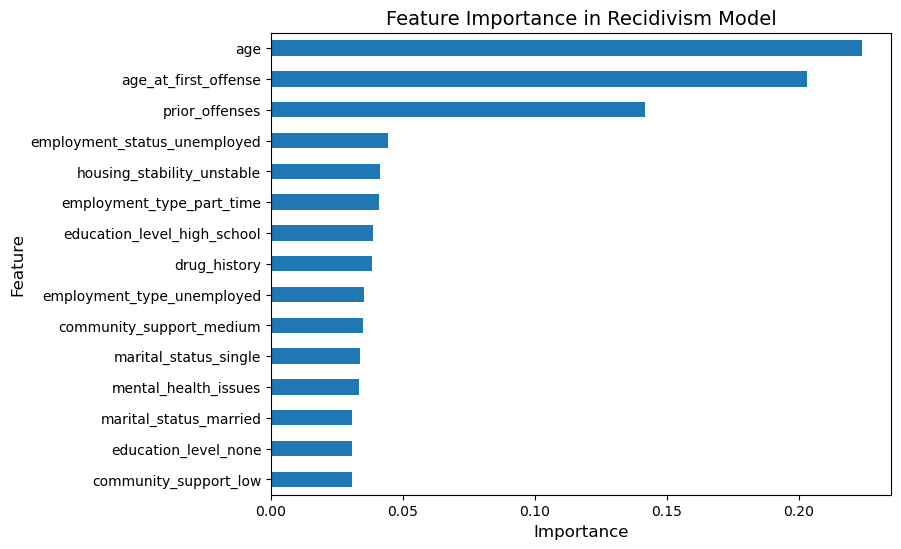

💾 Model saved as recidivism_model.pkl


In [10]:
data = pd.get_dummies(synthetic_data, drop_first=True)
X = data.drop("reoffended", axis=1)
y = data["reoffended"]

# -----------------------
# Step 3: Train/Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# Step 4: Train model
# -----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------
# Step 5: Evaluate model
# -----------------------
print("\n📊 MODEL PERFORMANCE:")
preds = model.predict(X_test)
print(classification_report(y_test, preds))

# -----------------------
# Step 6: Batch prediction on all synthetic cases
# -----------------------
new_cases = pd.read_csv("new_cases_large.csv")
new_cases_encoded = pd.get_dummies(new_cases, drop_first=True)
new_cases_encoded = new_cases_encoded.reindex(columns=X.columns, fill_value=0)

new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]
display(new_cases.head(10))

# Save predictions
new_cases.to_csv("predicted_results_large.csv", index=False)
print("✅ Predictions saved to predicted_results_large.csv")

# -----------------------
# Step 7: Feature importance visualization
# -----------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance in Recidivism Model", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# -----------------------
# Step 8: Save model
# -----------------------
joblib.dump(model, "recidivism_model.pkl")
print("💾 Model saved as recidivism_model.pkl")

✅ Created extended synthetic dataset: new_cases_extended.csv


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1



📊 MODEL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.46      0.21      0.29        61
           1       0.82      0.94      0.88       239

    accuracy                           0.79       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.75      0.79      0.76       300



,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0,0.27
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0,0.28
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1,0.79
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.94
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0,0.27
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.97
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1,0.86
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1,0.38
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1,0.87
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1,0.89


✅ Predictions saved to predicted_results_extended.csv


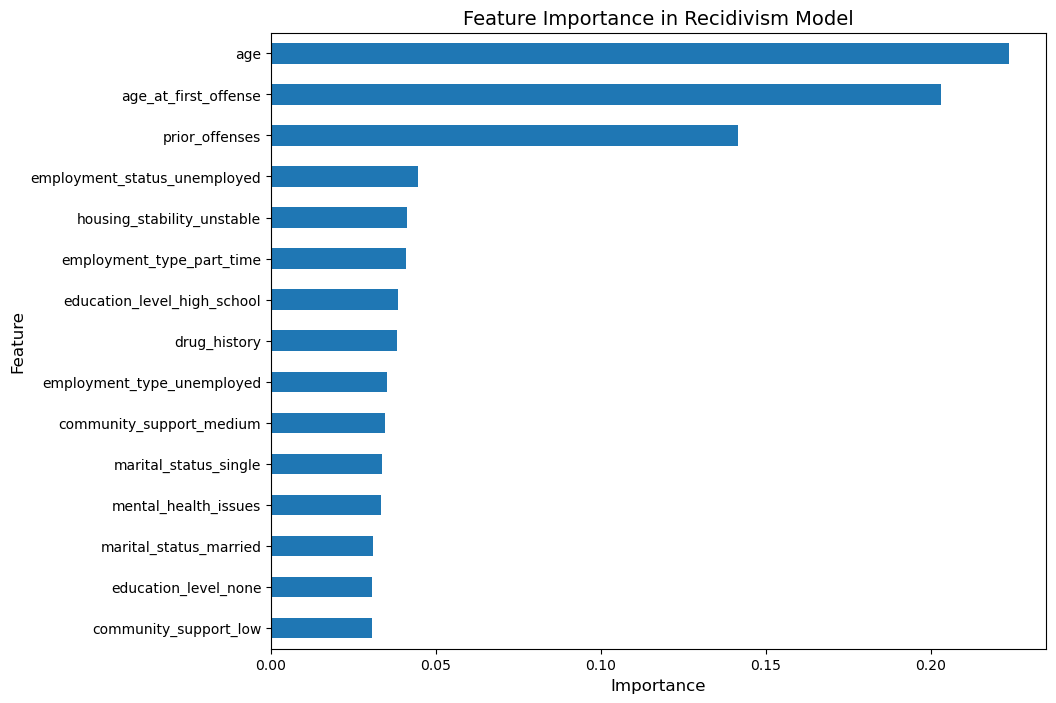

💾 Model saved as recidivism_model_extended.pkl


In [11]:
# ==================================================
# Extended Synthetic Recidivism AI Pipeline
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

%matplotlib inline

# -----------------------
# Step 1: Generate realistic synthetic data with extended factors
# -----------------------
np.random.seed(42)
n = 1000  # Number of synthetic individuals

# Existing features
age = np.random.normal(30, 8, n).astype(int)
age = np.clip(age, 18, 60)
prior_offenses = np.random.poisson(2, n)
employment_status = np.random.choice(["employed", "unemployed"], n, p=[0.6,0.4])
education_level = np.random.choice(["none","high_school","college"], n, p=[0.2,0.5,0.3])
drug_history = np.random.choice([0,1], n, p=[0.7,0.3])

# New factors
marital_status = np.random.choice(["single","married","divorced"], n, p=[0.5,0.4,0.1])
housing_stability = np.random.choice(["stable","unstable"], n, p=[0.7,0.3])
mental_health_issues = np.random.choice([0,1], n, p=[0.8,0.2])
age_at_first_offense = np.random.randint(10, 30, n)
community_support = np.random.choice(["low","medium","high"], n, p=[0.3,0.5,0.2])
employment_type = np.random.choice(["full_time","part_time","unemployed"], n, p=[0.5,0.2,0.3])

# Compute probability of reoffending based on features
reoffended_prob = (
    0.3
    + 0.01*(30 - age)
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
    + 0.05*(marital_status!="married").astype(int)
    + 0.1*(housing_stability=="unstable").astype(int)
    + 0.1*mental_health_issues
    + 0.01*(30 - age_at_first_offense)
    + 0.05*(community_support=="low").astype(int)
    + 0.05*(employment_type=="unemployed").astype(int)
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Build DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "marital_status": marital_status,
    "housing_stability": housing_stability,
    "mental_health_issues": mental_health_issues,
    "age_at_first_offense": age_at_first_offense,
    "community_support": community_support,
    "employment_type": employment_type,
    "reoffended": reoffended
})

# Save CSV
synthetic_data.to_csv("new_cases_extended.csv", index=False)
print("✅ Created extended synthetic dataset: new_cases_extended.csv")
display(synthetic_data.head(10))

# -----------------------
# Step 2: Preprocess for AI
# -----------------------
data_encoded = pd.get_dummies(synthetic_data, drop_first=True)
X = data_encoded.drop("reoffended", axis=1)
y = data_encoded["reoffended"]

# -----------------------
# Step 3: Train/Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# Step 4: Train Random Forest model
# -----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------
# Step 5: Evaluate model
# -----------------------
print("\n📊 MODEL PERFORMANCE:")
preds = model.predict(X_test)
print(classification_report(y_test, preds))

# -----------------------
# Step 6: Batch prediction
# -----------------------
new_cases = pd.read_csv("new_cases_extended.csv")
new_cases_encoded = pd.get_dummies(new_cases, drop_first=True)
new_cases_encoded = new_cases_encoded.reindex(columns=X.columns, fill_value=0)

new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]
display(new_cases.head(10))

# Save predictions
new_cases.to_csv("predicted_results_extended.csv", index=False)
print("✅ Predictions saved to predicted_results_extended.csv")

# -----------------------
# Step 7: Feature importance visualization
# -----------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,8))
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance in Recidivism Model", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# -----------------------
# Step 8: Save model
# -----------------------
joblib.dump(model, "recidivism_model_extended.pkl")
print("💾 Model saved as recidivism_model_extended.pkl")


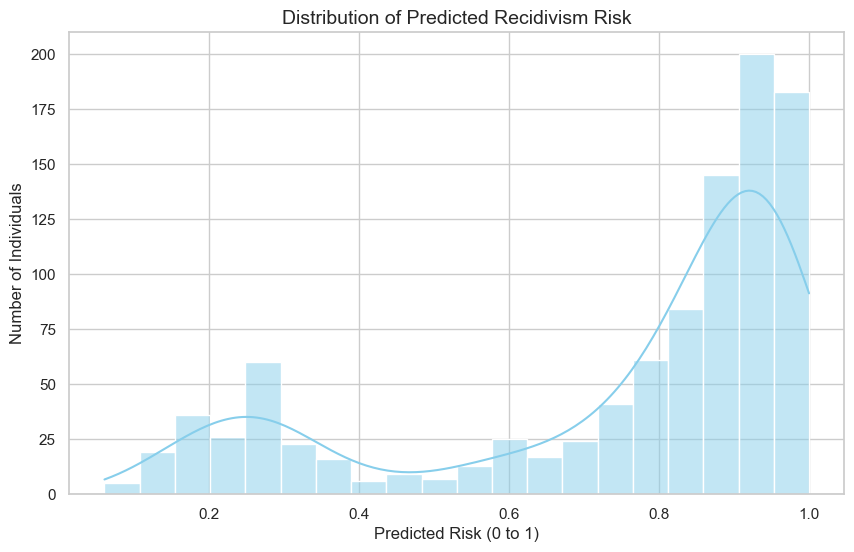


🔺 Number of high-risk individuals (risk > 0.7): 718


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1,0.79
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.94
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.97
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1,0.86
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1,0.87
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1,0.89
11,26,3,unemployed,none,0,single,stable,0,25,high,full_time,1,0.96
12,31,3,unemployed,high_school,0,single,unstable,1,26,medium,unemployed,1,0.97
13,18,1,employed,none,1,single,stable,0,15,high,full_time,1,0.93
14,18,0,unemployed,none,0,married,unstable,0,16,high,unemployed,1,0.96


In [12]:
# -----------------------
# Step 9: Visualize predicted risk scores
# -----------------------

import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Histogram of predicted risk
sns.histplot(new_cases["predicted_risk"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Predicted Recidivism Risk", fontsize=14)
plt.xlabel("Predicted Risk (0 to 1)", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.show()

# Highlight high-risk individuals (predicted risk > 0.7)
high_risk = new_cases[new_cases["predicted_risk"] > 0.7]
print(f"\n🔺 Number of high-risk individuals (risk > 0.7): {len(high_risk)}")
display(high_risk.head(10))


✅ Created extended synthetic dataset: new_cases_extended.csv


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1



📊 MODEL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.46      0.21      0.29        61
           1       0.82      0.94      0.88       239

    accuracy                           0.79       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.75      0.79      0.76       300



,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0,0.27
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0,0.28
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1,0.79
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.94
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0,0.27
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.97
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1,0.86
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1,0.38
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1,0.87
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1,0.89


✅ Predictions saved to predicted_results_extended.csv


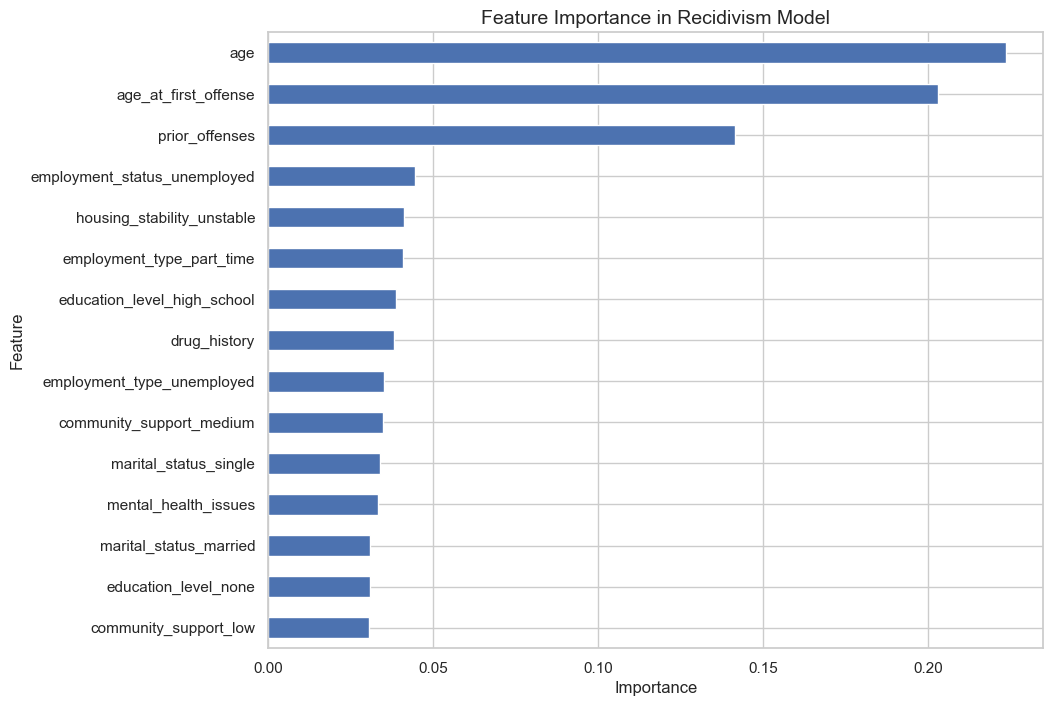

💾 Model saved as recidivism_model_extended.pkl


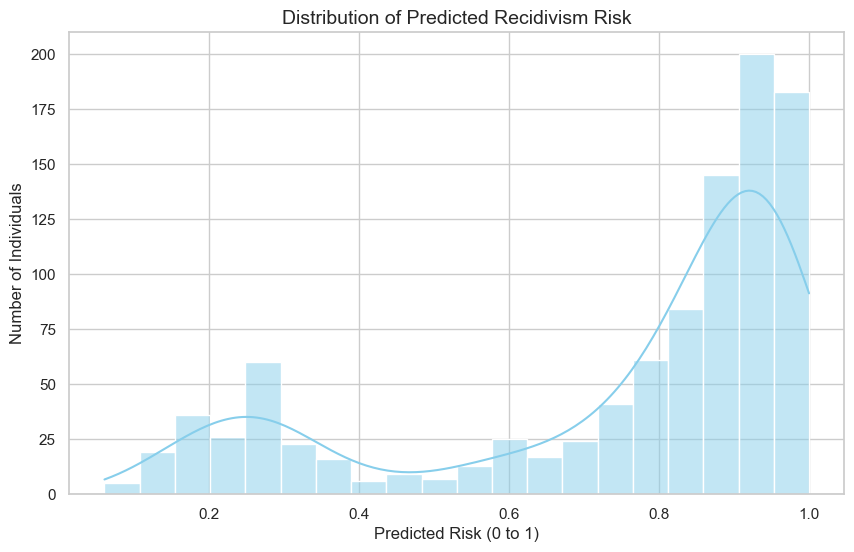


🔺 Number of high-risk individuals (risk > 0.7): 718


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1,0.79
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.94
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.97
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1,0.86
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1,0.87
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1,0.89
11,26,3,unemployed,none,0,single,stable,0,25,high,full_time,1,0.96
12,31,3,unemployed,high_school,0,single,unstable,1,26,medium,unemployed,1,0.97
13,18,1,employed,none,1,single,stable,0,15,high,full_time,1,0.93
14,18,0,unemployed,none,0,married,unstable,0,16,high,unemployed,1,0.96


In [14]:
# ==================================================
# Complete Extended Synthetic Recidivism AI Pipeline
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

%matplotlib inline
sns.set(style="whitegrid")

# -----------------------
# Step 1: Generate realistic synthetic data with extended factors
# -----------------------
np.random.seed(42)
n = 1000  # Number of synthetic individuals

# Existing features
age = np.random.normal(30, 8, n).astype(int)
age = np.clip(age, 18, 60)
prior_offenses = np.random.poisson(2, n)
employment_status = np.random.choice(["employed", "unemployed"], n, p=[0.6,0.4])
education_level = np.random.choice(["none","high_school","college"], n, p=[0.2,0.5,0.3])
drug_history = np.random.choice([0,1], n, p=[0.7,0.3])

# New factors
marital_status = np.random.choice(["single","married","divorced"], n, p=[0.5,0.4,0.1])
housing_stability = np.random.choice(["stable","unstable"], n, p=[0.7,0.3])
mental_health_issues = np.random.choice([0,1], n, p=[0.8,0.2])
age_at_first_offense = np.random.randint(10, 30, n)
community_support = np.random.choice(["low","medium","high"], n, p=[0.3,0.5,0.2])
employment_type = np.random.choice(["full_time","part_time","unemployed"], n, p=[0.5,0.2,0.3])

# Compute probability of reoffending
reoffended_prob = (
    0.3
    + 0.01*(30 - age)
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
    + 0.05*(marital_status!="married").astype(int)
    + 0.1*(housing_stability=="unstable").astype(int)
    + 0.1*mental_health_issues
    + 0.01*(30 - age_at_first_offense)
    + 0.05*(community_support=="low").astype(int)
    + 0.05*(employment_type=="unemployed").astype(int)
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Build DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "marital_status": marital_status,
    "housing_stability": housing_stability,
    "mental_health_issues": mental_health_issues,
    "age_at_first_offense": age_at_first_offense,
    "community_support": community_support,
    "employment_type": employment_type,
    "reoffended": reoffended
})

# Save CSV
synthetic_data.to_csv("new_cases_extended.csv", index=False)
print("✅ Created extended synthetic dataset: new_cases_extended.csv")
display(synthetic_data.head(10))

# -----------------------
# Step 2: Preprocess for AI
# -----------------------
data_encoded = pd.get_dummies(synthetic_data, drop_first=True)
X = data_encoded.drop("reoffended", axis=1)
y = data_encoded["reoffended"]

# -----------------------
# Step 3: Train/Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# Step 4: Train Random Forest model
# -----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------
# Step 5: Evaluate model
# -----------------------
print("\n📊 MODEL PERFORMANCE:")
preds = model.predict(X_test)
print(classification_report(y_test, preds))

# -----------------------
# Step 6: Batch prediction
# -----------------------
new_cases = pd.read_csv("new_cases_extended.csv")
new_cases_encoded = pd.get_dummies(new_cases, drop_first=True)
new_cases_encoded = new_cases_encoded.reindex(columns=X.columns, fill_value=0)

new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]
display(new_cases.head(10))

# Save predictions
new_cases.to_csv("predicted_results_extended.csv", index=False)
print("✅ Predictions saved to predicted_results_extended.csv")

# -----------------------
# Step 7: Feature importance visualization
# -----------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,8))
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance in Recidivism Model", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# -----------------------
# Step 8: Save model
# -----------------------
joblib.dump(model, "recidivism_model_extended.pkl")
print("💾 Model saved as recidivism_model_extended.pkl")

# -----------------------
# Step 9: Predicted risk visualization
# -----------------------
plt.figure(figsize=(10,6))
sns.histplot(new_cases["predicted_risk"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Predicted Recidivism Risk", fontsize=14)
plt.xlabel("Predicted Risk (0 to 1)", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.show()

# Highlight high-risk individuals (predicted risk > 0.7)
high_risk = new_cases[new_cases["predicted_risk"] > 0.7]
print(f"\n🔺 Number of high-risk individuals (risk > 0.7): {len(high_risk)}")
display(high_risk.head(10))


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
print(classification_report(y_test, preds))

# Batch prediction
new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]


              precision    recall  f1-score   support

           0       0.40      0.23      0.29        61
           1       0.82      0.91      0.87       239

    accuracy                           0.77       300
   macro avg       0.61      0.57      0.58       300
weighted avg       0.74      0.77      0.75       300



In [16]:
# ==================================================
# Extended Synthetic Recidivism AI Pipeline with Switchable Algorithms
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

%matplotlib inline
sns.set(style="whitegrid")

# -----------------------
# Step 1: Generate realistic synthetic data with extended factors
# -----------------------
np.random.seed(42)
n = 1000

# Existing features
age = np.random.normal(30, 8, n).astype(int)
age = np.clip(age, 18, 60)
prior_offenses = np.random.poisson(2, n)
employment_status = np.random.choice(["employed", "unemployed"], n, p=[0.6,0.4])
education_level = np.random.choice(["none","high_school","college"], n, p=[0.2,0.5,0.3])
drug_history = np.random.choice([0,1], n, p=[0.7,0.3])

# New factors
marital_status = np.random.choice(["single","married","divorced"], n, p=[0.5,0.4,0.1])
housing_stability = np.random.choice(["stable","unstable"], n, p=[0.7,0.3])
mental_health_issues = np.random.choice([0,1], n, p=[0.8,0.2])
age_at_first_offense = np.random.randint(10, 30, n)
community_support = np.random.choice(["low","medium","high"], n, p=[0.3,0.5,0.2])
employment_type = np.random.choice(["full_time","part_time","unemployed"], n, p=[0.5,0.2,0.3])

# Compute probability of reoffending
reoffended_prob = (
    0.3
    + 0.01*(30 - age)
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
    + 0.05*(marital_status!="married").astype(int)
    + 0.1*(housing_stability=="unstable").astype(int)
    + 0.1*mental_health_issues
    + 0.01*(30 - age_at_first_offense)
    + 0.05*(community_support=="low").astype(int)
    + 0.05*(employment_type=="unemployed").astype(int)
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Build DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "marital_status": marital_status,
    "housing_stability": housing_stability,
    "mental_health_issues": mental_health_issues,
    "age_at_first_offense": age_at_first_offense,
    "community_support": community_support,
    "employment_type": employment_type,
    "reoffended": reoffended
})

synthetic_data.to_csv("new_cases_extended.csv", index=False)
print("✅ Created extended synthetic dataset: new_cases_extended.csv")
display(synthetic_data.head(10))

# -----------------------
# Step 2: Preprocess for AI
# -----------------------
data_encoded = pd.get_dummies(synthetic_data, drop_first=True)
X = data_encoded.drop("reoffended", axis=1)
y = data_encoded["reoffended"]

# -----------------------
# Step 3: Train/Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# Step 4: Select Algorithm (change here to switch)
# Options: RandomForestClassifier, LogisticRegression, XGBClassifier
# -----------------------
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = LogisticRegression(max_iter=1000, random_state=42)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4,
                      random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train
model.fit(X_train, y_train)

# -----------------------
# Step 5: Evaluate model
# -----------------------
preds = model.predict(X_test)
print("\n📊 MODEL PERFORMANCE:")
print(classification_report(y_test, preds))

# -----------------------
# Step 6: Batch prediction
# -----------------------
new_cases = pd.read_csv("new_cases_extended.csv")
new_cases_encoded = pd.get_dummies(new_cases, drop_first=True)
new_cases_encoded = new_cases_encoded.reindex(columns=X.columns, fill_value=0)

new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]
display(new_cases.head(10))
new_cases.to_csv("predicted_results_extended.csv", index=False)
print("✅ Predictions saved to predicted_results_extended.csv")

# -----------------------
# Step 7: Feature importance visualization
# -----------------------
if hasattr(model, "feature_importances_"):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10,8))
    importances.sort_values().plot(kind="barh")
    plt.title("Feature Importance in Recidivism Model", fontsize=14)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.show()
else:
    print("⚠ Feature importance not available for this model")

# -----------------------
# Step 8: Save model
# -----------------------
joblib.dump(model, "recidivism_model_extended.pkl")
print("💾 Model saved as recidivism_model_extended.pkl")

# -----------------------
# Step 9: Predicted risk visualization
# -----------------------
plt.figure(figsize=(10,6))
sns.histplot(new_cases["predicted_risk"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Predicted Recidivism Risk", fontsize=14)
plt.xlabel("Predicted Risk (0 to 1)", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.show()

# Highlight high-risk individuals (predicted risk > 0.7)
high_risk = new_cases[new_cases["predicted_risk"] > 0.7]
print(f"\n🔺 Number of high-risk individuals (risk > 0.7): {len(high_risk)}")
display(high_risk.head(10))


ModuleNotFoundError: No module named 'xgboost'

In [24]:
model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=4,
    random_state=42, 
    use_label_encoder=False,  # must set False
    eval_metric="logloss"     # required for newer versions
)



In [18]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ----- ---------------------------------- 7.3/56.8 MB 42.9 MB/s eta 0:00:02
   ----------- ---------------------------- 16.3/56.8 MB 41.8 MB/s eta 0:00:01
   ------------------- -------------------- 27.0/56.8 MB 44.9 MB/s eta 0:00:01
   ------------------------- -------------- 35.7/56.8 MB 44.2 MB/s eta 0:00:01
   ------------------------------ --------- 43.5/56.8 MB 45.4 MB/s eta 0:00:01
   ---------------------------------------  56.6/56.8 MB 46.9 MB/s eta 0:00:01
   ---------------------------------------- 56.8/56.8 MB 43.8 MB/s eta 0:00:00


In [19]:
!pip install xgboost


In [22]:
from xgboost import XGBClassifier


In [23]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4,
                      random_state=42, use_label_encoder=False, eval_metric="logloss")


In [26]:
# ==================================================
# Extended Synthetic Recidivism AI Pipeline with Switchable Algorithms
# ==================================================

import sys
import subprocess

# -----------------------
# Ensure xgboost is installed
# -----------------------
try:
    import xgboost
except ImportError:
    print("XGBoost not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost

# -----------------------
# Standard imports
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

%matplotlib inline
sns.set(style="whitegrid")


In [27]:
# ==================================================
# Complete Extended Synthetic Recidivism AI Pipeline with Auto XGBoost Install
# ==================================================

import sys
import subprocess

# -----------------------
# Ensure xgboost is installed
# -----------------------
try:
    import xgboost
except ImportError:
    print("XGBoost not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost

# -----------------------
# Standard imports
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

%matplotlib inline
sns.set(style="whitegrid")

# -----------------------
# Step 1: Generate realistic synthetic data with extended factors
# -----------------------
np.random.seed(42)
n = 1000

# Existing features
age = np.random.normal(30, 8, n).astype(int)
age = np.clip(age, 18, 60)
prior_offenses = np.random.poisson(2, n)
employment_status = np.random.choice(["employed", "unemployed"], n, p=[0.6,0.4])
education_level = np.random.choice(["none","high_school","college"], n, p=[0.2,0.5,0.3])
drug_history = np.random.choice([0,1], n, p=[0.7,0.3])

# New factors
marital_status = np.random.choice(["single","married","divorced"], n, p=[0.5,0.4,0.1])
housing_stability = np.random.choice_


AttributeError: module 'numpy.random' has no attribute 'choice_'

✅ Created extended synthetic dataset: new_cases_extended.csv


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1



📊 MODEL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.47      0.33      0.38        61
           1       0.84      0.90      0.87       239

    accuracy                           0.79       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.76      0.79      0.77       300



C:\Users\monicastebbins\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:59:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0,0.316516
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0,0.666487
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1,0.860111
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.989092
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0,0.452522
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.997981
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1,0.603788
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1,0.338599
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1,0.863550
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1,0.894119


✅ Predictions saved to predicted_results_extended.csv


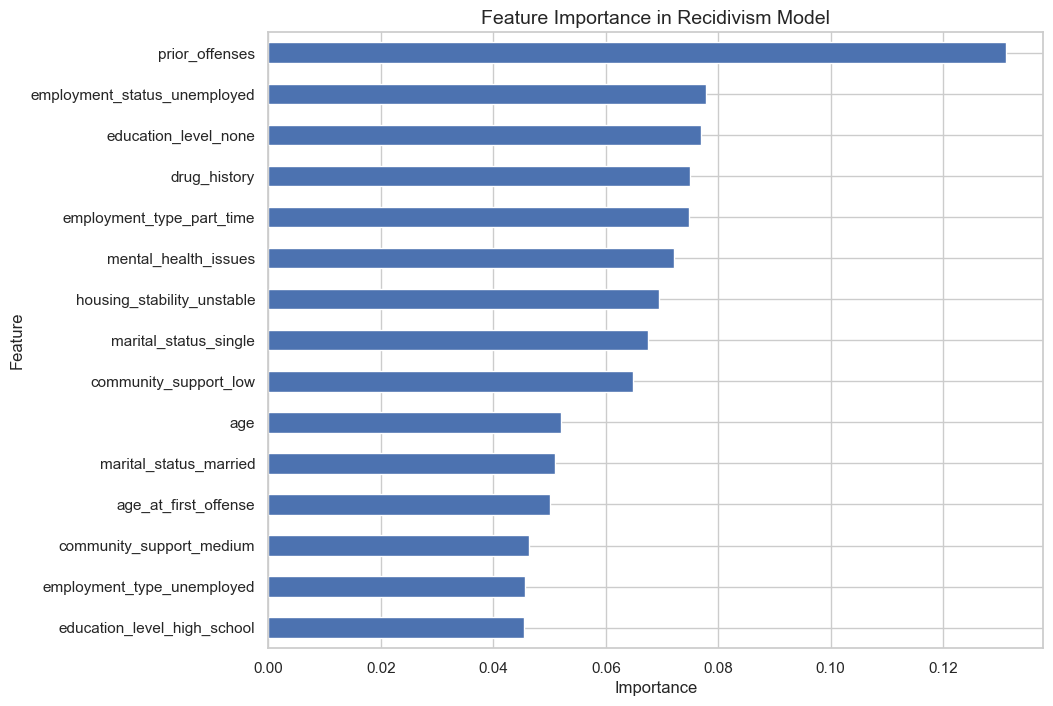

💾 Model saved as recidivism_model_extended.pkl


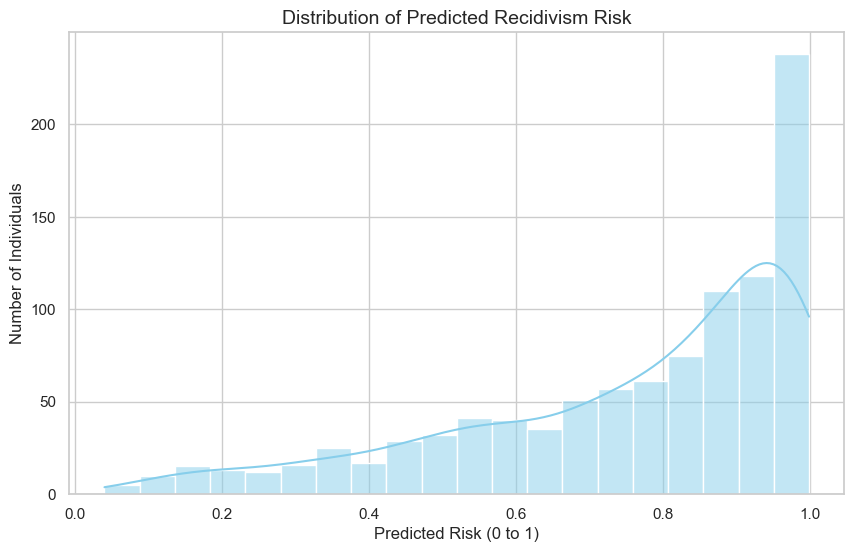


🔺 Number of high-risk individuals (risk > 0.7): 675


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1,0.860111
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.989092
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.997981
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1,0.863550
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1,0.894119
11,26,3,unemployed,none,0,single,stable,0,25,high,full_time,1,0.941278
12,31,3,unemployed,high_school,0,single,unstable,1,26,medium,unemployed,1,0.934881
13,18,1,employed,none,1,single,stable,0,15,high,full_time,1,0.918223
14,18,0,unemployed,none,0,married,unstable,0,16,high,unemployed,1,0.916548
15,25,1,employed,high_school,0,single,unstable,0,10,low,unemployed,0,0.859863


In [28]:
# ==================================================
# Complete Extended Synthetic Recidivism AI Pipeline with Auto XGBoost Install
# ==================================================

import sys
import subprocess

# -----------------------
# Ensure xgboost is installed
# -----------------------
try:
    import xgboost
except ImportError:
    print("XGBoost not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost

# -----------------------
# Standard imports
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

%matplotlib inline
sns.set(style="whitegrid")

# -----------------------
# Step 1: Generate realistic synthetic data with extended factors
# -----------------------
np.random.seed(42)
n = 1000

# Existing features
age = np.random.normal(30, 8, n).astype(int)
age = np.clip(age, 18, 60)
prior_offenses = np.random.poisson(2, n)
employment_status = np.random.choice(["employed", "unemployed"], n, p=[0.6,0.4])
education_level = np.random.choice(["none","high_school","college"], n, p=[0.2,0.5,0.3])
drug_history = np.random.choice([0,1], n, p=[0.7,0.3])

# New factors
marital_status = np.random.choice(["single","married","divorced"], n, p=[0.5,0.4,0.1])
housing_stability = np.random.choice(["stable","unstable"], n, p=[0.7,0.3])
mental_health_issues = np.random.choice([0,1], n, p=[0.8,0.2])
age_at_first_offense = np.random.randint(10, 30, n)
community_support = np.random.choice(["low","medium","high"], n, p=[0.3,0.5,0.2])
employment_type = np.random.choice(["full_time","part_time","unemployed"], n, p=[0.5,0.2,0.3])

# Compute probability of reoffending
reoffended_prob = (
    0.3
    + 0.01*(30 - age)
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
    + 0.05*(marital_status!="married").astype(int)
    + 0.1*(housing_stability=="unstable").astype(int)
    + 0.1*mental_health_issues
    + 0.01*(30 - age_at_first_offense)
    + 0.05*(community_support=="low").astype(int)
    + 0.05*(employment_type=="unemployed").astype(int)
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Build DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "marital_status": marital_status,
    "housing_stability": housing_stability,
    "mental_health_issues": mental_health_issues,
    "age_at_first_offense": age_at_first_offense,
    "community_support": community_support,
    "employment_type": employment_type,
    "reoffended": reoffended
})

synthetic_data.to_csv("new_cases_extended.csv", index=False)
print("✅ Created extended synthetic dataset: new_cases_extended.csv")
display(synthetic_data.head(10))

# -----------------------
# Step 2: Preprocess for AI
# -----------------------
data_encoded = pd.get_dummies(synthetic_data, drop_first=True)
X = data_encoded.drop("reoffended", axis=1)
y = data_encoded["reoffended"]

# -----------------------
# Step 3: Train/Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# Step 4: Select Algorithm (change here to switch)
# Options: RandomForestClassifier, LogisticRegression, XGBClassifier
# -----------------------
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = LogisticRegression(max_iter=1000, random_state=42)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4,
                      random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train
model.fit(X_train, y_train)

# -----------------------
# Step 5: Evaluate model
# -----------------------
preds = model.predict(X_test)
print("\n📊 MODEL PERFORMANCE:")
print(classification_report(y_test, preds))

# -----------------------
# Step 6: Batch prediction
# -----------------------
new_cases = pd.read_csv("new_cases_extended.csv")
new_cases_encoded = pd.get_dummies(new_cases, drop_first=True)
new_cases_encoded = new_cases_encoded.reindex(columns=X.columns, fill_value=0)

new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]
display(new_cases.head(10))
new_cases.to_csv("predicted_results_extended.csv", index=False)
print("✅ Predictions saved to predicted_results_extended.csv")

# -----------------------
# Step 7: Feature importance visualization
# -----------------------
if hasattr(model, "feature_importances_"):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10,8))
    importances.sort_values().plot(kind="barh")
    plt.title("Feature Importance in Recidivism Model", fontsize=14)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.show()
else:
    print("⚠ Feature importance not available for this model")

# -----------------------
# Step 8: Save model
# -----------------------
joblib.dump(model, "recidivism_model_extended.pkl")
print("💾 Model saved as recidivism_model_extended.pkl")

# -----------------------
# Step 9: Predicted risk visualization
# -----------------------
plt.figure(figsize=(10,6))
sns.histplot(new_cases["predicted_risk"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Predicted Recidivism Risk", fontsize=14)
plt.xlabel("Predicted Risk (0 to 1)", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.show()

# Highlight high-risk individuals (predicted risk > 0.7)
high_risk = new_cases[new_cases["predicted_risk"] > 0.7]
print(f"\n🔺 Number of high-risk individuals (risk > 0.7): {len(high_risk)}")
display(high_risk.head(10))


✅ Created extended synthetic dataset: new_cases_extended.csv


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1



📊 MODEL PERFORMANCE:
              precision    recall  f1-score   support

           0       0.47      0.33      0.38        61
           1       0.84      0.90      0.87       239

    accuracy                           0.79       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.76      0.79      0.77       300



C:\Users\monicastebbins\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:14:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
0,33,1,unemployed,college,0,single,stable,0,26,medium,part_time,0,0.316516
1,28,2,unemployed,high_school,0,single,stable,0,17,medium,full_time,0,0.666487
2,35,1,employed,high_school,1,divorced,stable,0,20,medium,unemployed,1,0.860111
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.989092
4,28,1,employed,college,0,married,unstable,0,17,high,unemployed,0,0.452522
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.997981
6,42,2,employed,high_school,0,divorced,stable,0,10,medium,unemployed,1,0.603788
7,36,0,employed,high_school,0,single,stable,0,22,high,unemployed,1,0.338599
8,26,1,unemployed,high_school,0,married,stable,1,26,high,unemployed,1,0.863550
9,34,3,unemployed,high_school,0,single,stable,0,23,medium,unemployed,1,0.894119


✅ Predictions saved to predicted_results_extended.csv


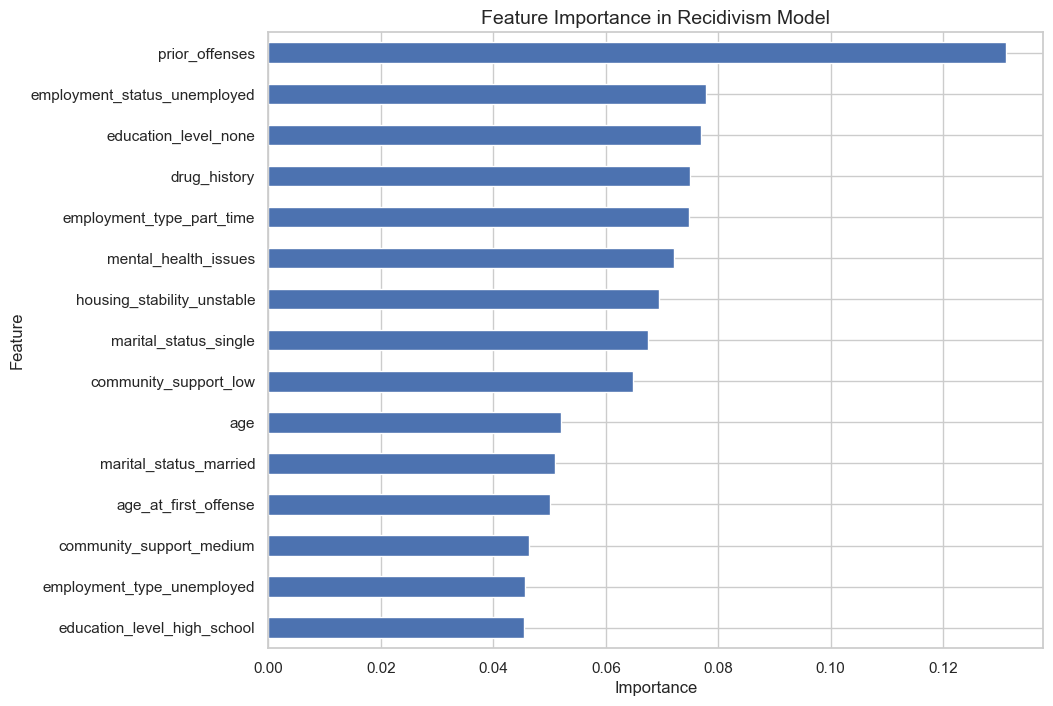

💾 Model saved as recidivism_model_extended.pkl


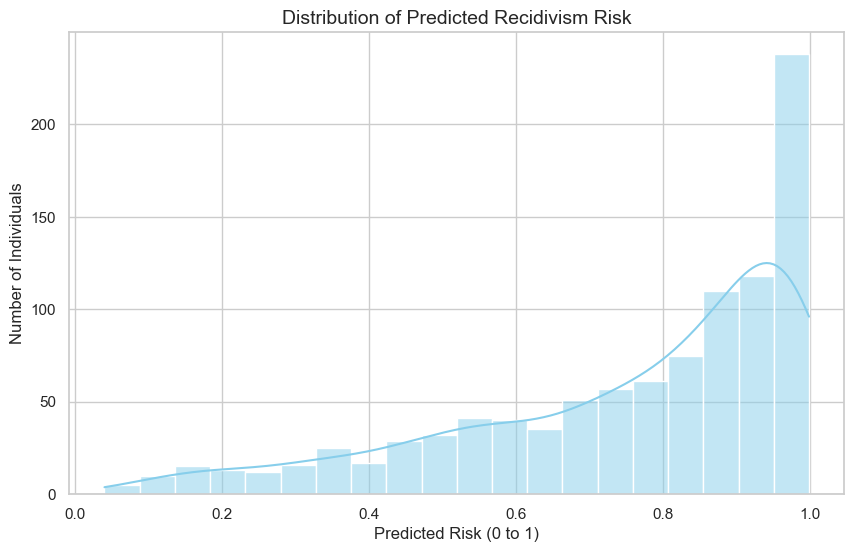


🔺 Number of high-risk individuals (risk > 0.9): 363


,age,prior_offenses,employment_status,education_level,drug_history,marital_status,housing_stability,mental_health_issues,age_at_first_offense,community_support,employment_type,reoffended,predicted_risk
3,42,5,unemployed,high_school,1,single,unstable,1,11,low,full_time,1,0.989092
5,28,4,employed,none,0,single,unstable,0,21,medium,unemployed,1,0.997981
11,26,3,unemployed,none,0,single,stable,0,25,high,full_time,1,0.941278
12,31,3,unemployed,high_school,0,single,unstable,1,26,medium,unemployed,1,0.934881
13,18,1,employed,none,1,single,stable,0,15,high,full_time,1,0.918223
14,18,0,unemployed,none,0,married,unstable,0,16,high,unemployed,1,0.916548
16,21,4,unemployed,high_school,0,married,stable,1,24,high,full_time,1,0.994689
19,18,3,employed,none,0,divorced,unstable,0,22,low,full_time,1,0.982748
21,28,3,employed,college,0,single,unstable,0,28,medium,full_time,1,0.937345
28,25,3,employed,college,0,single,stable,0,21,high,full_time,1,0.919380


✅ high_risk.csv


In [5]:
# ==================================================
# Complete Extended Synthetic Recidivism AI Pipeline with Auto XGBoost Install
# ==================================================

import sys
import subprocess

# -----------------------
# Ensure xgboost is installed
# -----------------------
try:
    import xgboost
except ImportError:
    print("XGBoost not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost

# -----------------------
# Standard imports
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

%matplotlib inline
sns.set(style="whitegrid")

# -----------------------
# Step 1: Generate realistic synthetic data with extended factors
# -----------------------
np.random.seed(42)
n = 1000

# Existing features
age = np.random.normal(30, 8, n).astype(int)
age = np.clip(age, 18, 60)
prior_offenses = np.random.poisson(2, n)
employment_status = np.random.choice(["employed", "unemployed"], n, p=[0.6,0.4])
education_level = np.random.choice(["none","high_school","college"], n, p=[0.2,0.5,0.3])
drug_history = np.random.choice([0,1], n, p=[0.7,0.3])

# New factors
marital_status = np.random.choice(["single","married","divorced"], n, p=[0.5,0.4,0.1])
housing_stability = np.random.choice(["stable","unstable"], n, p=[0.7,0.3])
mental_health_issues = np.random.choice([0,1], n, p=[0.8,0.2])
age_at_first_offense = np.random.randint(10, 30, n)
community_support = np.random.choice(["low","medium","high"], n, p=[0.3,0.5,0.2])
employment_type = np.random.choice(["full_time","part_time","unemployed"], n, p=[0.5,0.2,0.3])

# Compute probability of reoffending
reoffended_prob = (
    0.3
    + 0.01*(30 - age)
    + 0.1*prior_offenses
    + 0.1*(employment_status=="unemployed").astype(int)
    + 0.1*drug_history
    + 0.05*(marital_status!="married").astype(int)
    + 0.1*(housing_stability=="unstable").astype(int)
    + 0.1*mental_health_issues
    + 0.01*(30 - age_at_first_offense)
    + 0.05*(community_support=="low").astype(int)
    + 0.05*(employment_type=="unemployed").astype(int)
)
reoffended_prob = np.clip(reoffended_prob, 0, 1)
reoffended = (np.random.rand(n) < reoffended_prob).astype(int)

# Build DataFrame
synthetic_data = pd.DataFrame({
    "age": age,
    "prior_offenses": prior_offenses,
    "employment_status": employment_status,
    "education_level": education_level,
    "drug_history": drug_history,
    "marital_status": marital_status,
    "housing_stability": housing_stability,
    "mental_health_issues": mental_health_issues,
    "age_at_first_offense": age_at_first_offense,
    "community_support": community_support,
    "employment_type": employment_type,
    "reoffended": reoffended
})

synthetic_data.to_csv("new_cases_extended.csv", index=False)
print("✅ Created extended synthetic dataset: new_cases_extended.csv")
display(synthetic_data.head(10))

# -----------------------
# Step 2: Preprocess for AI
# -----------------------
data_encoded = pd.get_dummies(synthetic_data, drop_first=True)
X = data_encoded.drop("reoffended", axis=1)
y = data_encoded["reoffended"]

# -----------------------
# Step 3: Train/Test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------
# Step 4: Select Algorithm (change here to switch)
# Options: RandomForestClassifier, LogisticRegression, XGBClassifier
# -----------------------
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = LogisticRegression(max_iter=1000, random_state=42)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4,
                    random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train
model.fit(X_train, y_train)

# -----------------------
# Step 5: Evaluate model
# -----------------------
preds = model.predict(X_test)
print("\n📊 MODEL PERFORMANCE:")
print(classification_report(y_test, preds))

# -----------------------
# Step 6: Batch prediction
# -----------------------
new_cases = pd.read_csv("new_cases_extended.csv")
new_cases_encoded = pd.get_dummies(new_cases, drop_first=True)
new_cases_encoded = new_cases_encoded.reindex(columns=X.columns, fill_value=0)

new_cases["predicted_risk"] = model.predict_proba(new_cases_encoded)[:, 1]
display(new_cases.head(10))
new_cases.to_csv("predicted_results_extended.csv", index=False)
print("✅ Predictions saved to predicted_results_extended.csv")

# -----------------------
# Step 7: Feature importance visualization
# -----------------------
if hasattr(model, "feature_importances_"):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10,8))
    importances.sort_values().plot(kind="barh")
    plt.title("Feature Importance in Recidivism Model", fontsize=14)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.show()
else:
    print("⚠ Feature importance not available for this model")

# -----------------------
# Step 8: Save model
# -----------------------
joblib.dump(model, "recidivism_model_extended.pkl")
print("💾 Model saved as recidivism_model_extended.pkl")

# -----------------------
# Step 9: Predicted risk visualization
# -----------------------
plt.figure(figsize=(10,6))
sns.histplot(new_cases["predicted_risk"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Predicted Recidivism Risk", fontsize=14)
plt.xlabel("Predicted Risk (0 to 1)", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.show()

# Highlight high-risk individuals (predicted risk > 0.7)
high_risk = new_cases[new_cases["predicted_risk"] > 0.9]
print(f"\n🔺 Number of high-risk individuals (risk > 0.9): {len(high_risk)}")
display(high_risk.head(10))
high_risk.to_csv("high_risk.csv", index=False)
print("✅ high_risk.csv")

